## Project Title : Traffic Jam: Predicting People's Movement into Nairobi
Problem Description This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The towns from which these routes originate are: Awendo

** Homa Bay

** Kehancha

** Kendu Bay

** Keroka

** Keumbu

** Kijauri

** Kisii

** Mbita

** Migori

** Ndhiwa

** Nyachenge

** Oyugis

** Rodi

** Rongo

** Sirare

** Sori

The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

The three stops that all these routes make in Nairobi (in order) are: Kawangware: the first stop in the outskirts of Nairobi Westlands

**Afya Centre:** the main bus terminal where most passengers disembark All of these points are mapped here. Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

Data Description Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

Uber Movement traffic data can be accessed here. Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

Variables description: ride_id: unique ID of a vehicle on a specific route on a specific day and time. seat_number: seat assigned to ticket

payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment_receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel_from: town from which ride originated

travel_to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)

max_capacity: number of seats on the vehicle

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

Mounting the drive and reading the dataset file

In [4]:
df = pd.read_csv('/home/siddhant/Documents/Transport_Demand_Prediction/train_revised.csv')

## Exploring the dataset

In [5]:
df.shape

(51645, 10)

In [6]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [7]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ride_id,51645.0,NaN,NaN,NaN,10188.645793,2211.295708,1442.0,8287.0,10353.0,12029.0,20117.0
seat_number,51645,61,1,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,51645,2,Mpesa,51532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_receipt,51645,51645,UZUEHCBUSO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_date,51645,149,10-12-17,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_time,51645,78,7:09,3926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_from,51645,17,Kisii,22607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_to,51645,1,Nairobi,51645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_type,51645,2,Bus,31985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_capacity,51645.0,NaN,NaN,NaN,34.534321,18.451193,11.0,11.0,49.0,49.0,49.0


## Finding the target variable
Since Target Variable not available we'll find the target variable by grouping the data to get the numbere of ticket booked as per ride_id

In [10]:
# featching Dependent variable as it is not given.
temp_df=df.groupby(['ride_id']).ride_id.count().rename('Number_of_ticket').reset_index()
temp_df

,ride_id,Number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [11]:
#Since we get the dependent variable. Now we will merge it with the original data.
df=df.merge(temp_df,how='left',on='ride_id')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27


In [12]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'Number_of_ticket'],
      dtype='object')

In [13]:
# Dropping the attribute that are not sinificant for predicting the Number_of_ticket
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1,inplace=True)

In [14]:
df['date_and_time']=df['travel_date']+" "+df['travel_time']

In [15]:
# formating data to pandas Date and time.
df['date_and_time']=pd.to_datetime(df['date_and_time'])

In [16]:
df.date_and_time[2006]

Timestamp('2018-11-03 10:50:00')

In [17]:
df

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,Number_of_ticket,date_and_time
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00
...,...,...,...,...,...,...,...,...
51640,13826,20-04-18,8:00,Awendo,Bus,49,1,2018-04-20 08:00:00
51641,13809,20-04-18,8:00,Migori,Bus,49,29,2018-04-20 08:00:00
51642,13809,20-04-18,8:00,Migori,Bus,49,29,2018-04-20 08:00:00
51643,13796,20-04-18,7:08,Awendo,Bus,49,27,2018-04-20 07:08:00


Exploratory Data Analysis

/home/siddhant/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_ticket', ylabel='Density'>

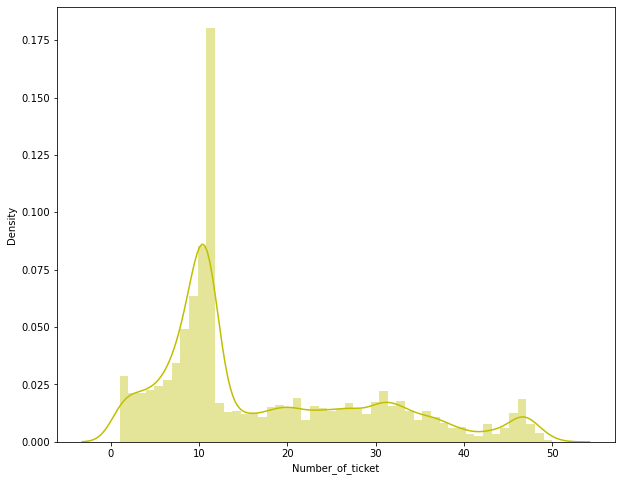

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['Number_of_ticket'],color='y')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, '7:15'),
  Text(1, 0, '7:12'),
  Text(2, 0, '7:05'),
  Text(3, 0, '7:10'),
  Text(4, 0, '7:09'),
  Text(5, 0, '5:10'),
  Text(6, 0, '9:50'),
  Text(7, 0, '7:06'),
  Text(8, 0, '6:00'),
  Text(9, 0, '5:50'),
  Text(10, 0, '10:58'),
  Text(11, 0, '6:50'),
  Text(12, 0, '5:30'),
  Text(13, 0, '6:40'),
  Text(14, 0, '9:10'),
  Text(15, 0, '5:00'),
  Text(16, 0, '5:20'),
  Text(17, 0, '10:52'),
  Text(18, 0, '10:50'),
  Text(19, 0, '10:51'),
  Text(20, 0, '8:20'),
  Text(21, 0, '19:03'),
  Text(22, 0, '7:02'),
  Text(23, 0, '6:30'),
  Text(24, 0, '7:20'),
  Text(25, 0, '7:04'),
  Text(26, 0, '19:05'),
  Text(27, 0, '19:04'),
  Tex

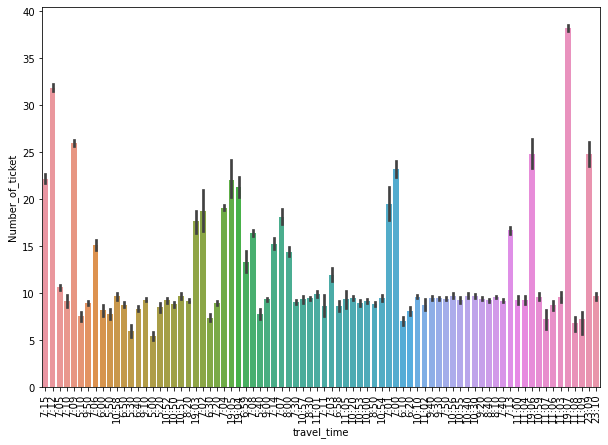

In [20]:
fig=plt.figure(figsize=(10,7))
ax=fig.gca()
sns.barplot(data=df,x='travel_time',y='Number_of_ticket',ax=ax)
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Migori'),
  Text(1, 0, 'Keroka'),
  Text(2, 0, 'Homa Bay'),
  Text(3, 0, 'Kisii'),
  Text(4, 0, 'Keumbu'),
  Text(5, 0, 'Rongo'),
  Text(6, 0, 'Kijauri'),
  Text(7, 0, 'Oyugis'),
  Text(8, 0, 'Awendo'),
  Text(9, 0, 'Sirare'),
  Text(10, 0, 'Nyachenge'),
  Text(11, 0, 'Kehancha'),
  Text(12, 0, 'Kendu Bay'),
  Text(13, 0, 'Sori'),
  Text(14, 0, 'Rodi'),
  Text(15, 0, 'Mbita'),
  Text(16, 0, 'Ndhiwa')])

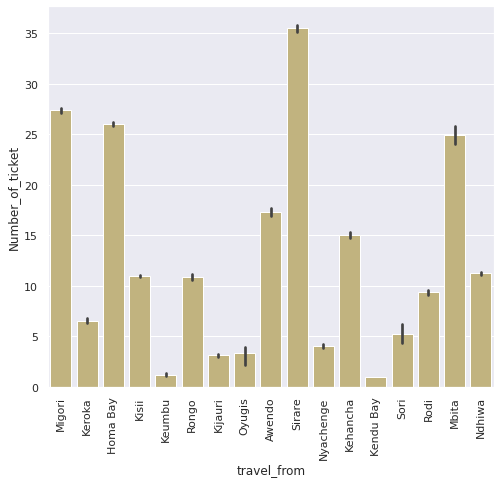

In [21]:
fig=plt.figure(figsize=(8,7))
ax=fig.gca()
sns.barplot(data=df,x='travel_from',y='Number_of_ticket',ax=ax,color='y')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)

<Figure size 576x504 with 0 Axes>

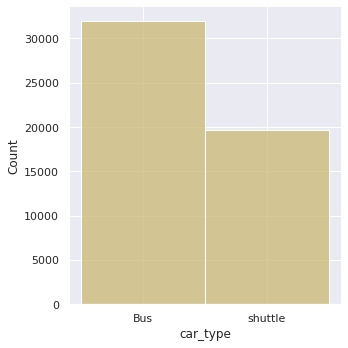

In [22]:
plt.figure(figsize=(8,7))
sns.displot(df['car_type'],color='y')

(array([0, 1]), [Text(0, 0, '11'), Text(1, 0, '49')])

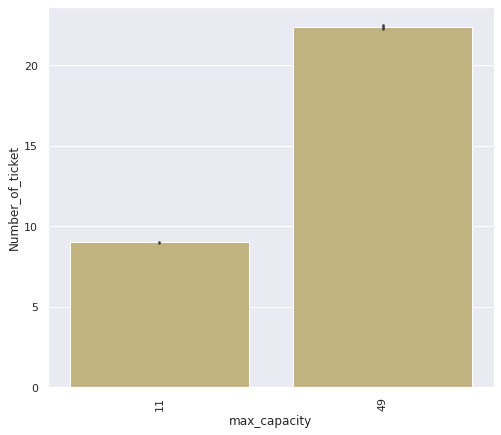

In [23]:
fig=plt.figure(figsize=(8,7))
ax=fig.gca()
sns.barplot(data=df,x='max_capacity',y='Number_of_ticket',ax=ax,color='y')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)

In [24]:
#creating more variable using Date and time field
df['day_of_year']=df['date_and_time'].dt.day_of_year
df['month']=df['date_and_time'].dt.month
df['week']=df['date_and_time'].dt.week
df['day_of_month']=df['date_and_time'].dt.month
df['quater']=df['date_and_time'].dt.quarter
df['day_of_week']=df['date_and_time'].dt.dayofweek

/tmp/ipykernel_5065/665172318.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['date_and_time'].dt.week


In [26]:
def conv_weekend(a):
    if a <=4:
        return 0
    if a>4 and a<7:
        return 1

In [31]:
df['weekend']=df['day_of_week'].apply(conv_weekend)
df['hour']=df['date_and_time'].dt.hour
df['day_of_week'].unique()

array([1, 6, 0, 4, 3, 2, 5])

In [32]:
def period_count(hour):
    if hour<=5:
        return "Late Night"
    if hour>5 and hour<=10:
        return "Morning"
    if hour>10 and hour<=15:
        return "After Noon"
    if hour>15 and hour<20:
        return "Evening"
    else:
        return "Night"

/home/siddhant/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

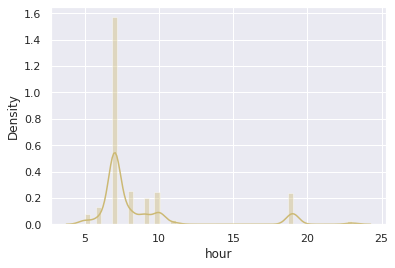

In [35]:
sns.distplot(df.hour,color='y')

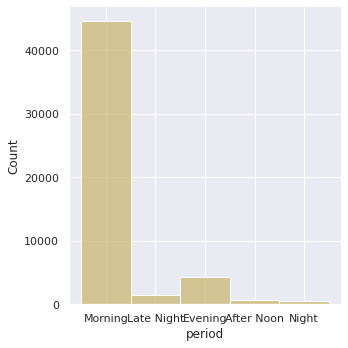

In [36]:
df['period']=df.hour.apply(period_count)
sns.displot(df.period,color='y')

## Feature Engineering

In [37]:
# Adding Weight based on Frequency of the Period
period_weight={"Morning":4,"Evening":2.5,"Late Night":2,"After Noon":1,"Night":0.5}
df['period_weight']=df.period.map(period_weight)

In [39]:
#Assigning weight to day of year
day_of_year_weight=dict(df.day_of_year.value_counts())
df['day_of_year_weight']=np.log1p(df.day_of_year.map(day_of_year_weight))

In [40]:
#Assigning weight to Week
week_of_year_weight=dict(df.week.value_counts())
df['week_of_year_weight']=np.log1p(df.week.map(week_of_year_weight))

In [41]:
#Assigning weight to day of month column
day_of_month_weight=dict(df.day_of_month.value_counts())
df['day_of_month_weight']=np.log1p(df.day_of_month.map(day_of_month_weight))

In [42]:
# Assigning weight to Month column
month_weight=dict(df.month.value_counts())
df['month_weight']=np.log1p(df.month.map(month_weight))


**Mapping distance to Nairobi,** That will help us to calculate the aproximate time taken by the bus to reach Nairobi. Using which the model will be abel to calculate the trafic jam based on frequency of the passanger. As H0 at this moment is passange will not prefer to travel when there destination time is in working hours.

In [43]:
# Mapping distance to Nairobi.
travel_distance_to_Nairobi_dict = {'Awendo':352, 'Homa Bay':368, 'Kehancha':308, 'Kendu Bay':343, 'Keroka':281, 'Keumbu':295,
                                   'Kijauri':272, 'Kisii':306, 'Mbita':406, 'Migori':373, 'Ndhiwa':385, 'Nyachenge':313, 'Oyugis':324,
                                   'Rodi':348, 'Rongo':333, 'Sirare':415, 'Sori':407}
df['travel_distance_to_Nairobi'] = df.travel_from.map(travel_distance_to_Nairobi_dict)

In [44]:
# Since we've been given that time taken to reach nairobi is about 8 to 9 hours. Lets assume that it take 510 minutes to reach nariobi which is the average.
df['Travel_time_to_out_skirt'] = 510
df['Total_travel_time']=660

In [45]:
from datetime import timedelta,datetime,time
def caltimedelta(x):
    return timedelta(minutes=x)


In [46]:
def extract_time(x):
    return datetime.time(x)

In [47]:
df['Arrival_time_to_out_skirt']=df.date_and_time+df['Travel_time_to_out_skirt'].apply(caltimedelta)
df['Arrival_time_to_Nairobi']=df.date_and_time+df['Total_travel_time'].apply(caltimedelta)
df['Arrival_time']=df.Arrival_time_to_Nairobi.apply(extract_time)


In [48]:
def trafic_peak_hours(x):
    if (x >= time(8,0,0) and x< time(10,30,0)) or (x> time(18,0,0) and x< time(20,30,0)):
        return 0
    else:
        return 1



In [49]:
df['Arrival_time_at_no_trafic_rush_time']=df.Arrival_time.apply(trafic_peak_hours)


/home/siddhant/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival_time_at_no_trafic_rush_time', ylabel='Density'>

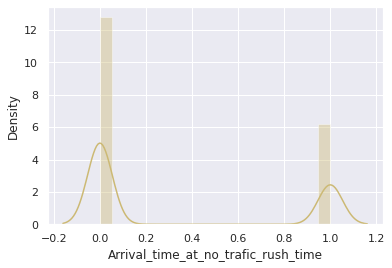

In [50]:
# The above distplot clearly shows that most of the bus scheduled when it arrival time is not a peak hour
sns.distplot(df.Arrival_time_at_no_trafic_rush_time ,color='y')

In [51]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,Number_of_ticket,date_and_time,day_of_year,month,...,week_of_year_weight,day_of_month_weight,month_weight,travel_distance_to_Nairobi,Travel_time_to_out_skirt,Total_travel_time,Arrival_time_to_out_skirt,Arrival_time_to_Nairobi,Arrival_time,Arrival_time_at_no_trafic_rush_time
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,290,10,...,0.693147,7.611348,7.611348,373,510,660,2017-10-17 15:45:00,2017-10-17 18:15:00,18:15:00,0
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,323,11,...,1.098612,8.035926,8.035926,373,510,660,2017-11-19 15:42:00,2017-11-19 18:12:00,18:12:00,0
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,330,11,...,0.693147,8.035926,8.035926,281,510,660,2017-11-26 15:35:00,2017-11-26 18:05:00,18:05:00,0
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,331,11,...,7.521318,8.035926,8.035926,368,510,660,2017-11-27 15:40:00,2017-11-27 18:10:00,18:10:00,0
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,331,11,...,7.521318,8.035926,8.035926,373,510,660,2017-11-27 15:42:00,2017-11-27 18:12:00,18:12:00,0


In [52]:
df.sort_values(['travel_from','date_and_time'],inplace=True)

In [53]:
# creating field for previous bus time and next bus time and time between last and next bus in seconds.
df['delay_btw_previous_and_next_bus']=(df.groupby(['travel_from']).date_and_time.shift(-1)-df.groupby(['travel_from']).date_and_time.shift(1)).dt.total_seconds()/3600
df['delay_btw_next1bus']=(df.date_and_time-df.groupby(['travel_from']).date_and_time.shift(-1)).dt.total_seconds()/3600
df['delay_btw_previous1bus']=(df.date_and_time-df.groupby(['travel_from']).date_and_time.shift(1)).dt.total_seconds()/3600
#df['delay_btw_previous_and_next_bus']=df['delay_btw_previous_and_next_bus']

In [54]:
df.isnull().sum()

ride_id                                 0
travel_date                             0
travel_time                             0
travel_from                             0
car_type                                0
max_capacity                            0
Number_of_ticket                        0
date_and_time                           0
day_of_year                             0
month                                   0
week                                    0
day_of_month                            0
quater                                  0
day_of_week                             0
weekend                                 0
hour                                    0
period                                  0
period_weight                           0
day_of_year_weight                      0
week_of_year_weight                     0
day_of_month_weight                     0
month_weight                            0
travel_distance_to_Nairobi              0
Travel_time_to_out_skirt          

In [55]:
#Filling null value using ffill method and backfill method.
df['delay_btw_previous_and_next_bus']=df.delay_btw_previous_and_next_bus.fillna(method='ffill')
df['delay_btw_previous_and_next_bus']=df.delay_btw_previous_and_next_bus.fillna(method='backfill')
df['delay_btw_next1bus']=df.delay_btw_next1bus.fillna(method='ffill')
df['delay_btw_next1bus']=df.delay_btw_next1bus.fillna(method='backfill')
df['delay_btw_previous1bus']=df.delay_btw_previous1bus.fillna(method='ffill')
df['delay_btw_previous1bus']=df.delay_btw_previous1bus.fillna(method='backfill')

In [56]:
df.describe(include='all').T

/tmp/ipykernel_5065/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
/tmp/ipykernel_5065/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
/tmp/ipykernel_5065/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ride_id,51645.0,NaN,NaN,NaN,NaT,NaT,10188.645793,2211.295708,1442.0,8287.0,10353.0,12029.0,20117.0
travel_date,51645,149,10-12-17,856,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_time,51645,78,7:09,3926,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_from,51645,17,Kisii,22607,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_type,51645,2,Bus,31985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_capacity,51645.0,NaN,NaN,NaN,NaT,NaT,34.534321,18.451193,11.0,11.0,49.0,49.0,49.0
Number_of_ticket,51645.0,NaN,NaN,NaN,NaT,NaT,17.280918,12.375598,1.0,9.0,11.0,26.0,50.0
date_and_time,51645,4579,2018-02-19 19:07:00,57,2017-01-12 05:00:00,2018-12-04 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_year,51645.0,NaN,NaN,NaN,NaT,NaT,161.680821,123.240773,1.0,52.0,108.0,285.0,365.0
month,51645.0,NaN,NaN,NaN,NaT,NaT,5.890774,4.111171,1.0,2.0,4.0,10.0,12.0


<AxesSubplot:>

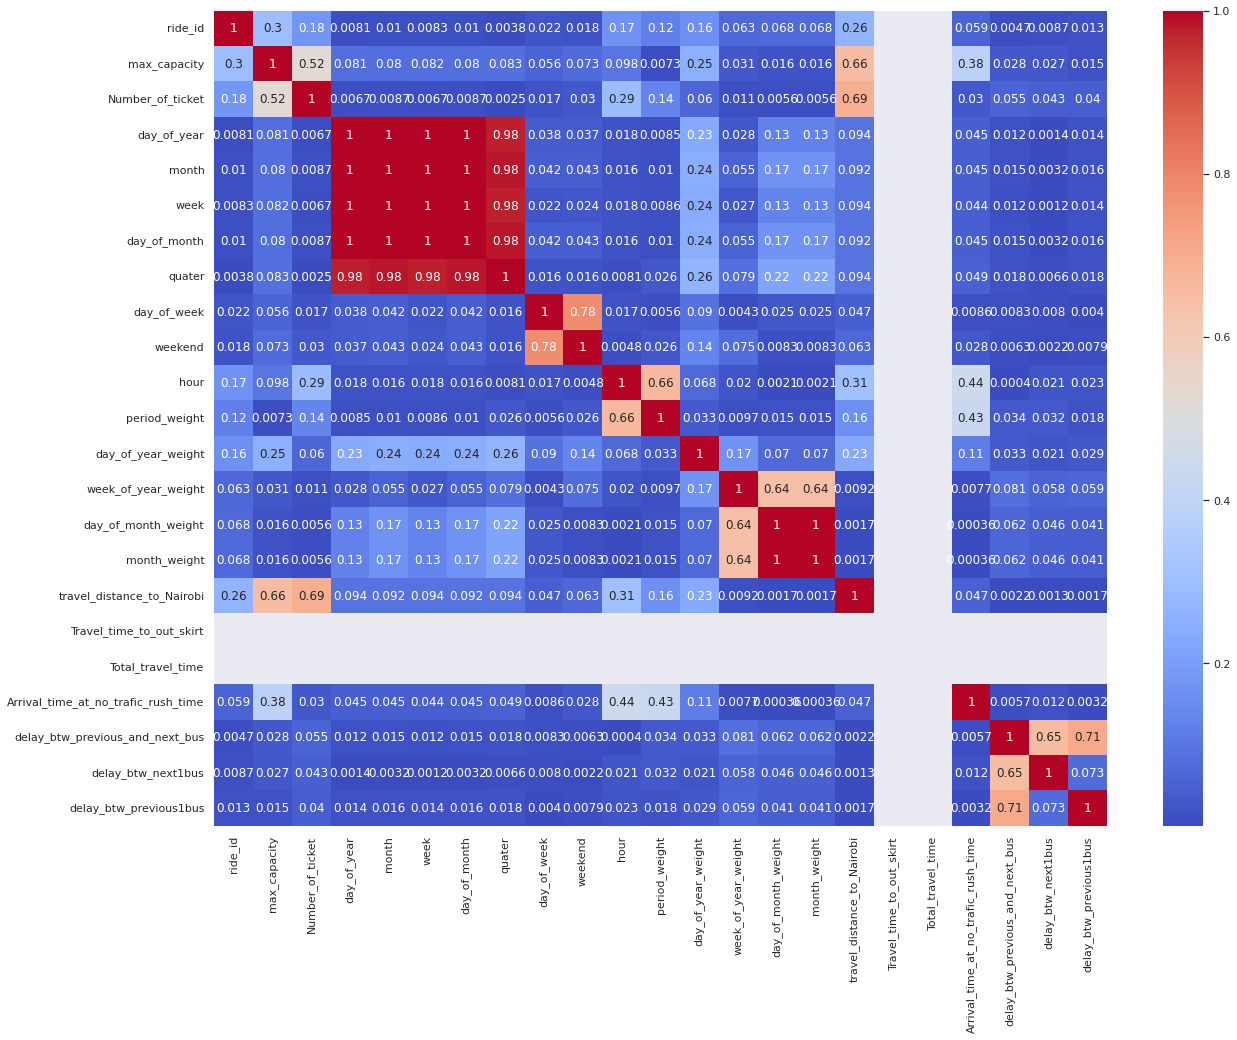

In [57]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
correlation=df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [58]:
#Generating dummy variable for catagriocal Column
df=pd.get_dummies(df,columns=['car_type','travel_from'])

In [59]:
# Dropping column that are not siginificant for the model.
df.drop(['travel_date','travel_time','date_and_time','period','Arrival_time','Arrival_time_to_out_skirt','Arrival_time_to_Nairobi'],axis=1,inplace=True)


In [60]:
df.columns

Index(['ride_id', 'max_capacity', 'Number_of_ticket', 'day_of_year', 'month',
       'week', 'day_of_month', 'quater', 'day_of_week', 'weekend', 'hour',
       'period_weight', 'day_of_year_weight', 'week_of_year_weight',
       'day_of_month_weight', 'month_weight', 'travel_distance_to_Nairobi',
       'Travel_time_to_out_skirt', 'Total_travel_time',
       'Arrival_time_at_no_trafic_rush_time',
       'delay_btw_previous_and_next_bus', 'delay_btw_next1bus',
       'delay_btw_previous1bus', 'car_type_Bus', 'car_type_shuttle',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori'],
      dtype='object')

In [61]:
X=df[['ride_id', 'max_capacity', 'Number_of_ticket', 'day_of_year', 'month',
       'week', 'day_of_month', 'quater', 'day_of_week', 'weekend', 'hour',
       'period_weight', 'day_of_year_weight', 'week_of_year_weight',
       'day_of_month_weight', 'month_weight', 'travel_distance_to_Nairobi',
       'Travel_time_to_out_skirt', 'Total_travel_time',
       'Arrival_time_at_no_trafic_rush_time',
       'delay_btw_previous_and_next_bus', 'delay_btw_next1bus',
       'delay_btw_previous1bus', 'car_type_Bus', 'car_type_shuttle',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori']]
Y=df['Number_of_ticket']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [63]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)
scalling=MinMaxScaler()
X_train=scalling.fit_transform(X_train)
X_test=scalling.transform(X_test)

## Linear Regression Model

In [64]:
model1=LinearRegression()

In [65]:
model1.fit(X_train,Y_train)

LinearRegression()

In [66]:
model1.score(X_train,Y_train)

1.0

In [67]:
model1.score(X_test,Y_test)

1.0

In [68]:
model1.predict(X_train[:10])

array([25.,  3.,  9., 13., 27., 34.,  8., 39., 21.,  9.])

In [69]:
Y_train[:10]

4088     25
533       3
6172      9
23807    13
46405    27
40060    34
1441      8
43602    39
26212    21
994       9
Name: Number_of_ticket, dtype: int64

In [70]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model1.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model1.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model1.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model1.predict(X_train))))
print("R Square:",r2_score(Y_train,model1.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 8.240253337841394e-27
Train RMSE: 9.077584115744339e-14
Train MAE : 7.051824083094218e-14
Train MAPE: 2.6555270819734107e-07
R Square: 1.0


In [71]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model1.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model1.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model1.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model1.predict(X_test))))
print("R Square:",r2_score(Y_test,model1.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 8.351061781519898e-27
Train RMSE: 9.138414403779191e-14
Train MAE : 7.06505776097125e-14
Train MAPE: 2.65801763744548e-07
R Square: 1.0


## Ridge Model

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model2=Ridge()
parameters={
    'alpha':[0.00001,0.0001,0.001,0.004,0.008,0.01,0.04,0.08, 0.1, 1, 5, 8]
}
model2=GridSearchCV(model2,parameters,cv=5)

In [74]:
model2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.004, 0.008, 0.01,
                                   0.04, 0.08, 0.1, 1, 5, 8]})

In [75]:
model2.score(X_train,Y_train)

1.0

In [76]:
model2.score(X_test,Y_test)

1.0

In [77]:
model2.predict(X_train[:10])

array([25.00000004,  3.00000002,  9.        , 13.00000007, 26.99999994,
       33.99999992,  8.00000001, 38.99999989, 20.99999998,  8.99999999])

In [78]:
model2.best_params_

{'alpha': 1e-05}

In [79]:
Y_train[:10]

4088     25
533       3
6172      9
23807    13
46405    27
40060    34
1441      8
43602    39
26212    21
994       9
Name: Number_of_ticket, dtype: int64

In [80]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model2.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model2.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model2.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model2.predict(X_train))))
print("R Square:",r2_score(Y_train,model2.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 5.383315414760237e-15
Train RMSE: 7.337108023438279e-08
Train MAE : 5.2355049223464424e-08
Train MAPE: 0.00022881225759006972
R Square: 1.0


In [81]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model2.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model2.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model2.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model2.predict(X_test))))
print("R Square:",r2_score(Y_test,model2.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 5.433532423233442e-15
Train RMSE: 7.371249841942303e-08
Train MAE : 5.2720036522704233e-08
Train MAPE: 0.00022960844174965396
R Square: 1.0


## Lasso Model

In [82]:
from sklearn.linear_model import Lasso
model3=Ridge()
parameters={
    'alpha':[0.00001,0.0001,0.001,0.004,0.008,0.01,0.04,0.08, 0.1, 1, 5, 8]
}
model3=GridSearchCV(model3,parameters,cv=5)

In [83]:
model3.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.004, 0.008, 0.01,
                                   0.04, 0.08, 0.1, 1, 5, 8]})

In [84]:
model3.score(X_train,Y_train)

1.0

In [85]:
model3.score(X_test,Y_test)

1.0

In [86]:
model3.best_params_

{'alpha': 1e-05}

In [87]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model3.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model3.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model3.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model3.predict(X_train))))
print("R Square:",r2_score(Y_train,model3.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 5.383315414760237e-15
Train RMSE: 7.337108023438279e-08
Train MAE : 5.2355049223464424e-08
Train MAPE: 0.00022881225759006972
R Square: 1.0


In [88]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model3.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model3.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model3.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model3.predict(X_test))))
print("R Square:",r2_score(Y_test,model3.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 5.433532423233442e-15
Train RMSE: 7.371249841942303e-08
Train MAE : 5.2720036522704233e-08
Train MAPE: 0.00022960844174965396
R Square: 1.0


## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model4=RandomForestRegressor()
parameters={
    'n_estimators':[100,120,150,170,200,220,250,280],
    'max_depth':[5,8,10,12,15,18]
}
model4=GridSearchCV(model4,parameters,cv=5)

In [91]:
model4.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 10, 12, 15, 18],
                         'n_estimators': [100, 120, 150, 170, 200, 220, 250,
                                          280]})

In [92]:
model4.score(X_train,Y_train)

1.0

In [93]:
model4.score(X_test,Y_test)

1.0

In [94]:
model4.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [95]:
model4.predict(X_train[:10])

array([25.,  3.,  9., 13., 27., 34.,  8., 39., 21.,  9.])

In [96]:
Y_train[:10]

4088     25
533       3
6172      9
23807    13
46405    27
40060    34
1441      8
43602    39
26212    21
994       9
Name: Number_of_ticket, dtype: int64

In [97]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model4.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model4.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model4.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model4.predict(X_train))))
print("R Square:",r2_score(Y_train,model4.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 0.0
Train RMSE: 0.0
Train MAE : 0.0
Train MAPE: 0.0
R Square: 1.0


In [98]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model4.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model4.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model4.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model4.predict(X_test))))
print("R Square:",r2_score(Y_test,model4.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 0.0
Train RMSE: 0.0
Train MAE : 0.0
Train MAPE: 0.0
R Square: 1.0


## Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
model5=DecisionTreeRegressor()
parameters={
    'criterion':['squared_error', 'absolute_error'],
    'max_depth':[5,8,10,12,15,18]
}
model5=GridSearchCV(model5,parameters,cv=5)

In [101]:
model5.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 8, 10, 12, 15, 18]})

In [102]:
model5.score(X_train,Y_train)

1.0

In [103]:
model5.score(X_test,Y_test)

1.0

In [104]:
model5.best_params_

{'criterion': 'squared_error', 'max_depth': 8}

In [105]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model5.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model5.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model5.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model5.predict(X_train))))
print("R Square:",r2_score(Y_train,model5.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 0.0
Train RMSE: 0.0
Train MAE : 0.0
Train MAPE: 0.0
R Square: 1.0


In [106]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model5.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model5.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model5.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model5.predict(X_test))))
print("R Square:",r2_score(Y_test,model5.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 0.0
Train RMSE: 0.0
Train MAE : 0.0
Train MAPE: 0.0
R Square: 1.0


## XGB Regressor Model

In [107]:
import xgboost as xg
model6=xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
parameters={
    'n_estimators':[10,15,20,25,30],
    'max_depth':[10,12,15,18]
}
model6=GridSearchCV(model6,parameters,cv=5)

In [108]:
model6.fit(X_train,Y_train)

[12:05:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:07] WARNING: ../src/objective/regression_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [109]:
model6.score(X_train,Y_train)

0.9999999984587007

In [110]:
model6.score(X_test,Y_test)

0.9999999984712182

In [111]:
model5.best_params_

{'criterion': 'squared_error', 'max_depth': 8}

In [112]:
print("************ Train Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_train,model6.predict(X_train)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_train,model6.predict(X_train))))
print("Train MAE :",mean_absolute_error(Y_train,model6.predict(X_train)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_train,model6.predict(X_train))))
print("R Square:",r2_score(Y_train,model6.predict(X_train)))

************ Train Evaluation metrics************
Train MSE : 2.358583809969053e-07
Train RMSE: 0.0004856525311340458
Train MAE : 0.000385181503531801
Train MAPE: 0.019626041463621773
R Square: 0.9999999984587007


In [113]:
print("************ Test Evaluation metrics************")
print("Train MSE :",mean_squared_error(Y_test,model6.predict(X_test)))
print("Train RMSE:",np.sqrt(mean_squared_error(Y_test,model6.predict(X_test))))
print("Train MAE :",mean_absolute_error(Y_test,model6.predict(X_test)))
print("Train MAPE:",np.sqrt(mean_absolute_error(Y_test,model6.predict(X_test))))
print("R Square:",r2_score(Y_test,model6.predict(X_test)))

************ Test Evaluation metrics************
Train MSE : 2.3489953226972095e-07
Train RMSE: 0.00048466435011224106
Train MAE : 0.0003829689256241712
Train MAPE: 0.01956959186146127
R Square: 0.9999999984712182


## Conclusion
In this project, we have used four different types of regression-based algorithms like Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. We have tried Regularization and hyperparameter tuning to determine the best model.

All of the models were able to give 100% accuracy but Random Forest and Decision Tree were able to give a MSE of 0.0. Hence Any of these two model can be used to accurately predict the ticket that will be sold by Mobiticket for a perticular ride.